In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [205]:
df=pd.read_csv("C:\\Users\\hp\\Documents\\IAFSM_ML\\LinearRegression\\Dataset\\Medical Price Dataset.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='bmi', ylabel='age'>,
        <AxesSubplot:xlabel='children', ylabel='age'>,
        <AxesSubplot:xlabel='charges', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='bmi'>,
        <AxesSubplot:xlabel='bmi', ylabel='bmi'>,
        <AxesSubplot:xlabel='children', ylabel='bmi'>,
        <AxesSubplot:xlabel='charges', ylabel='bmi'>],
       [<AxesSubplot:xlabel='age', ylabel='children'>,
        <AxesSubplot:xlabel='bmi', ylabel='children'>,
        <AxesSubplot:xlabel='children', ylabel='children'>,
        <AxesSubplot:xlabel='charges', ylabel='children'>],
       [<AxesSubplot:xlabel='age', ylabel='charges'>,
        <AxesSubplot:xlabel='bmi', ylabel='charges'>,
        <AxesSubplot:xlabel='children', ylabel='charges'>,
        <AxesSubplot:xlabel='charges', ylabel='charges'>]], dtype=object)

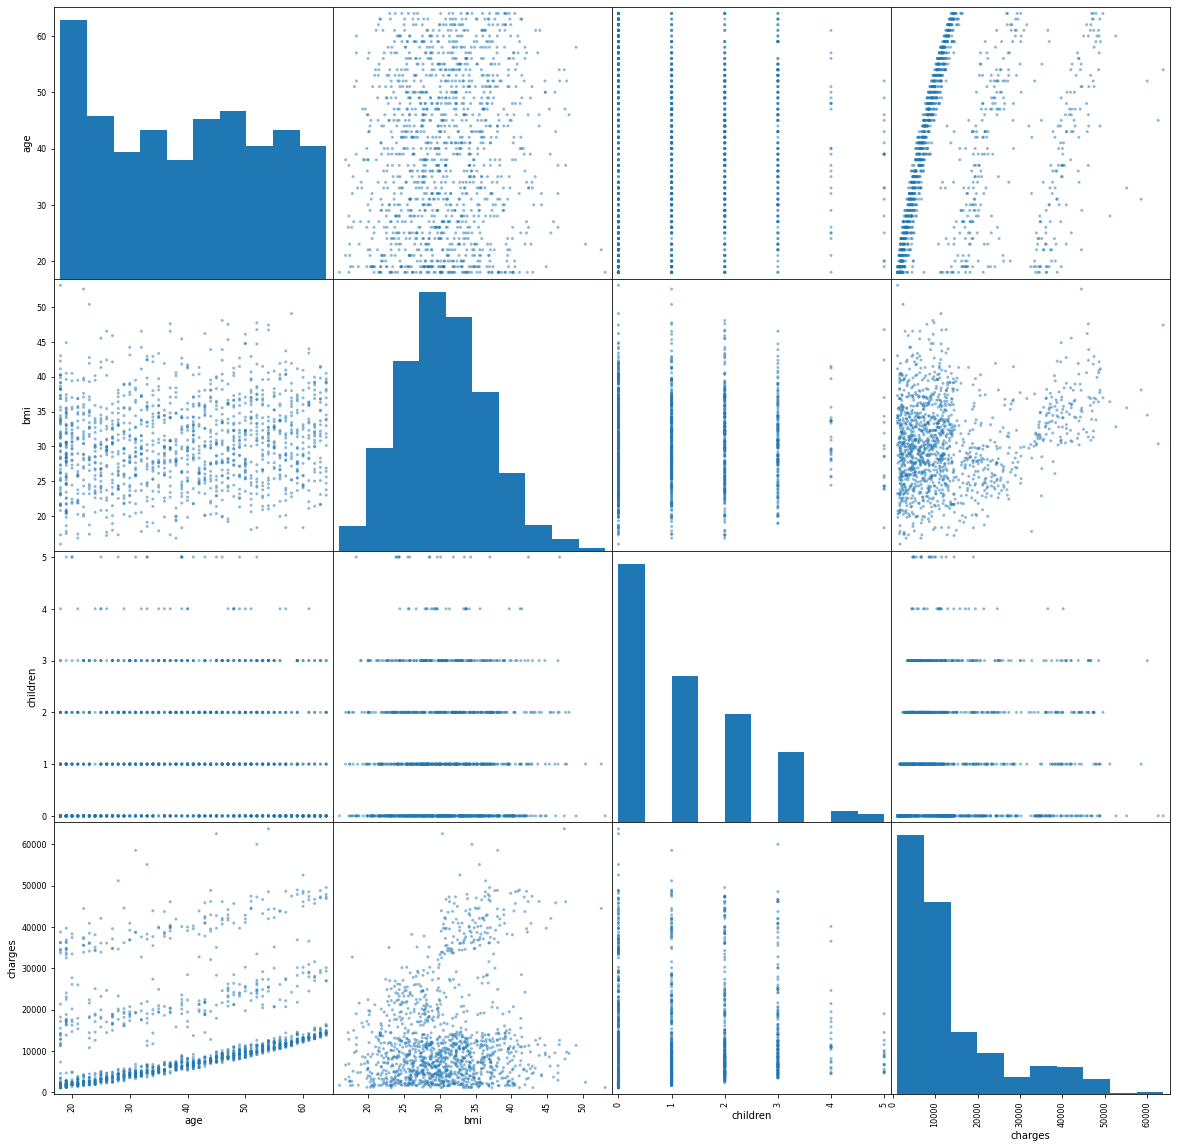

In [310]:
pd.plotting.scatter_matrix(df,figsize=(20,20))

In [206]:
X=df.drop(["charges"],axis=1)
Y=df["charges"]

## One Hot encoding categorical columns

In [214]:
X_new=pd.get_dummies(X,columns=["sex","region","smoker"])

In [217]:
X_new

,age,bmi,children,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_yes
0,19,27.900,0,0,0,0,0,1,1
1,18,33.770,1,1,0,0,1,0,0
2,28,33.000,3,1,0,0,1,0,0
3,33,22.705,0,1,0,1,0,0,0
4,32,28.880,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0,0,0
1334,18,31.920,0,0,1,0,0,0,0
1335,18,36.850,0,0,0,0,1,0,0
1336,21,25.800,0,0,0,0,0,1,0


In [216]:
X_new=X_new.drop(["sex_female","smoker_no"],axis=1)


## Normalizing dataset

In [218]:
X_new["age"]=X_new["age"]/X_new["age"].max()
X_new["bmi"]=X_new["bmi"]/X_new["bmi"].max()
X_new["children"]=X_new["children"]/X_new["children"].max()
Y=Y/Y.max()

In [219]:
X_new.describe()

,age,bmi,children,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_yes
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,0.612610,0.577139,0.218984,0.505232,0.242152,0.242900,0.272048,0.242900,0.204783
std,0.219531,0.114779,0.241099,0.500160,0.428546,0.428995,0.445181,0.428995,0.403694
min,0.281250,0.300395,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.421875,0.494942,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.609375,0.572181,0.200000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.796875,0.652997,0.400000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [347]:
def train_test_split(X, Y, split):

    #split=size of test dataset
    #randomly assigning split% rows to training set and rest to test set
    indices = np.array(range(len(X)))
    
    train_size = round((1-split) * len(X))

    random.shuffle(indices)

    train_indices = indices[0:train_size]
    test_indices = indices[train_size:len(X)]

    X_train = X.iloc[train_indices, :]
    X_test = X.iloc[test_indices, :]
    Y_train = Y.iloc[train_indices]
    Y_test = Y.iloc[test_indices]
    
    return X_train,X_test,Y_train,Y_test

## Splitting data in train and test set

In [349]:
x_train,x_test,y_train,y_test=train_test_split(X_new,Y,split=0.2)

## Initializing coefficient array and converting X and Y into numpy array

In [352]:
x=np.asarray(x_train)
y=np.asarray(y_train)
m=x.shape[0]
x_train = np.concatenate((np.ones((len(x),1)),x),axis=1)  ##adding the bias constant x0 in the data 
print(x_bias.shape)
coeff=np.ones([len(x_bias[0]),1])
print(coeff.shape)

(1070, 10)
(10, 1)


## Function to compute cost of the function
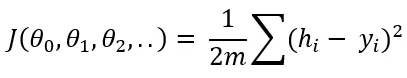
hi-- hypothesis
yi-- true value of target

In [300]:
def computeCost(X,Y,coef):
    error=(np.sum(X*coef.T,axis=1)-Y)**2
    print(error)
    cost=error/(2*m)
    return sum(cost)

## Function to implement gradient descent
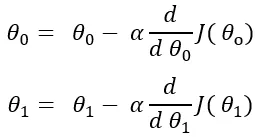

After differentiating above function

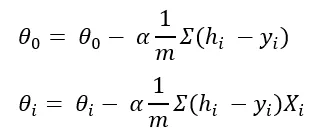

alpha-- learning rate

In [357]:
def gradientDescent(X, y ):
    J = []  #cost function in each iterations
    theta=coeff.copy()
    learning_rate=0.5
    epoch=1000
    for i in range(0,epoch):        
        y1 = X*theta.T
        y1 = np.sum(y1, axis=1)
        for c in range(0, len(X[0])):
            theta[c] = theta[c] - learning_rate*((sum((y1-y)*X[:,c]))/m)
        j = computeCost(X, y, theta)
        J.append(j)
      
    return J, j, theta

In [358]:
J,j,theta=gradientDescent(x_bias,y)

[0.57931254 0.38391589 0.12424884 ... 0.36705102 0.57606673 1.01686572]
[0.01503246 0.00098358 0.1025889  ... 0.00574701 0.00433697 0.00398226]
[0.0007027  0.01530694 0.04009972 ... 0.00268443 0.00459993 0.0447872 ]
[2.21903746e-07 1.01254847e-02 4.64684781e-02 ... 1.64660172e-03
 1.48505967e-03 3.04261348e-02]
[6.36860660e-06 9.54721015e-03 4.32892503e-02 ... 2.71949237e-03
 1.39900529e-03 2.87436424e-02]
[1.51065732e-07 8.43051954e-03 4.19036693e-02 ... 3.48439664e-03
 1.01294579e-03 2.55201917e-02]
[7.70948015e-07 7.54467758e-03 4.03619846e-02 ... 4.35066438e-03
 7.47542092e-04 2.29109058e-02]
[5.22781060e-06 6.74645498e-03 3.89830802e-02 ... 5.21070102e-03
 5.28227995e-04 2.05254522e-02]
[1.33538913e-05 6.04299131e-03 3.77071911e-02 ... 6.06586209e-03
 3.57141259e-04 1.83915978e-02]
[2.50445674e-05 5.41939566e-03 3.65374454e-02 ... 6.90077556e-03
 2.26313876e-04 1.64738664e-02]
[4.00237991e-05 4.86617955e-03 3.54661921e-02 ... 7.70669600e-03
 1.30200974e-04 1.47506001e-02]
[5.80163

[1.57406023e-03 4.15032552e-07 2.85687607e-02 ... 1.15336093e-02
 2.78419800e-03 1.72152435e-03]
[1.58199232e-03 3.65228618e-07 2.85739853e-02 ... 1.15006408e-02
 2.79270755e-03 1.76024752e-03]
[1.58982729e-03 3.23431089e-07 2.85781011e-02 ... 1.14687165e-02
 2.80099993e-03 1.79853567e-03]
[1.59756738e-03 2.88564563e-07 2.85811381e-02 ... 1.14378077e-02
 2.80908459e-03 1.83638472e-03]
[1.60521474e-03 2.59701169e-07 2.85831259e-02 ... 1.14078863e-02
 2.81697056e-03 1.87379141e-03]
[1.61277143e-03 2.36046818e-07 2.85840942e-02 ... 1.13789246e-02
 2.82466651e-03 1.91075327e-03]
[1.62023945e-03 2.16928522e-07 2.85840723e-02 ... 1.13508953e-02
 2.83218078e-03 1.94726855e-03]
[1.62762068e-03 2.01782714e-07 2.85830892e-02 ... 1.13237717e-02
 2.83952136e-03 1.98333616e-03]
[1.63491697e-03 1.90144492e-07 2.85811735e-02 ... 1.12975276e-02
 2.84669592e-03 2.01895560e-03]
[1.64213008e-03 1.81637716e-07 2.85783537e-02 ... 1.12721374e-02
 2.85371180e-03 2.05412698e-03]
[1.64926171e-03 1.75965901e-07

[2.05957976e-03 1.82859517e-05 2.69790570e-02 ... 1.05871963e-02
 3.24778188e-03 3.82450442e-03]
[2.06297792e-03 1.87769964e-05 2.69570306e-02 ... 1.05858886e-02
 3.25192000e-03 3.83623106e-03]
[2.06635271e-03 1.92730556e-05 2.69350686e-02 ... 1.05846192e-02
 3.25605974e-03 3.84783957e-03]
[2.06970442e-03 1.97740291e-05 2.69131727e-02 ... 1.05833866e-02
 3.26020108e-03 3.85933204e-03]
[2.07303329e-03 2.02798167e-05 2.68913442e-02 ... 1.05821892e-02
 3.26434397e-03 3.87071048e-03]
[2.07633960e-03 2.07903184e-05 2.68695847e-02 ... 1.05810256e-02
 3.26848837e-03 3.88197688e-03]
[2.07962358e-03 2.13054347e-05 2.68478955e-02 ... 1.05798942e-02
 3.27263421e-03 3.89313319e-03]
[2.08288550e-03 2.18250661e-05 2.68262779e-02 ... 1.05787937e-02
 3.27678145e-03 3.90418131e-03]
[2.08612559e-03 2.23491136e-05 2.68047331e-02 ... 1.05777228e-02
 3.28093002e-03 3.91512309e-03]
[2.08934409e-03 2.28774788e-05 2.67832624e-02 ... 1.05766802e-02
 3.28507983e-03 3.92596037e-03]
[2.09254125e-03 2.34100635e-05

[2.31055039e-03 7.77247698e-05 2.52102904e-02 ... 1.05209316e-02
 3.64444407e-03 4.61660706e-03]
[2.31247470e-03 7.83529764e-05 2.51962771e-02 ... 1.05203686e-02
 3.64820194e-03 4.62232303e-03]
[2.31438929e-03 7.89803564e-05 2.51823360e-02 ... 1.05198049e-02
 3.65195061e-03 4.62800781e-03]
[2.31629424e-03 7.96068891e-05 2.51684666e-02 ... 1.05192406e-02
 3.65569001e-03 4.63366168e-03]
[2.31818962e-03 8.02325544e-05 2.51546686e-02 ... 1.05186756e-02
 3.65942009e-03 4.63928493e-03]
[2.32007547e-03 8.08573324e-05 2.51409417e-02 ... 1.05181099e-02
 3.66314079e-03 4.64487782e-03]
[2.32195187e-03 8.14812040e-05 2.51272853e-02 ... 1.05175437e-02
 3.66685203e-03 4.65044064e-03]
[2.32381888e-03 8.21041502e-05 2.51136993e-02 ... 1.05169768e-02
 3.67055377e-03 4.65597365e-03]
[2.32567657e-03 8.27261527e-05 2.51001832e-02 ... 1.05164094e-02
 3.67424594e-03 4.66147710e-03]
[2.32752499e-03 8.33471935e-05 2.50867366e-02 ... 1.05158414e-02
 3.67792850e-03 4.66695126e-03]
[2.32936421e-03 8.39672551e-05

[0.00251098 0.00015474 0.02377604 ... 0.01044385 0.00407854 0.00520685]
[0.00251196 0.00015517 0.02376925 ... 0.0104434  0.00408081 0.00520972]
[0.00251293 0.0001556  0.02376249 ... 0.01044295 0.00408307 0.00521258]
[0.00251389 0.00015602 0.02375576 ... 0.01044251 0.00408532 0.00521542]
[0.00251485 0.00015645 0.02374907 ... 0.01044207 0.00408756 0.00521826]
[0.00251581 0.00015687 0.0237424  ... 0.01044162 0.00408979 0.00522108]
[0.00251676 0.00015729 0.02373577 ... 0.01044118 0.00409201 0.00522389]
[0.00251771 0.00015771 0.02372917 ... 0.01044075 0.00409422 0.00522668]
[0.00251866 0.00015812 0.02372261 ... 0.01044031 0.00409642 0.00522947]
[0.0025196  0.00015854 0.02371607 ... 0.01043987 0.00409862 0.00523224]
[0.00252053 0.00015895 0.02370957 ... 0.01043944 0.0041008  0.00523499]
[0.00252146 0.00015937 0.0237031  ... 0.01043901 0.00410298 0.00523774]
[0.00252239 0.00015978 0.02369666 ... 0.01043858 0.00410514 0.00524047]
[0.00252331 0.00016019 0.02369025 ... 0.01043815 0.0041073  0.00

[0.00261763 0.00020433 0.02304556 ... 0.01039317 0.00433109 0.00552214]
[0.00261812 0.00020457 0.02304226 ... 0.01039293 0.00433226 0.00552359]
[0.0026186  0.00020481 0.02303899 ... 0.0103927  0.00433343 0.00552504]
[0.00261909 0.00020504 0.02303572 ... 0.01039246 0.0043346  0.00552648]
[0.00261957 0.00020528 0.02303248 ... 0.01039223 0.00433576 0.00552791]
[0.00262005 0.00020552 0.02302925 ... 0.01039199 0.00433691 0.00552934]
[0.00262053 0.00020575 0.02302603 ... 0.01039176 0.00433806 0.00553076]
[0.00262101 0.00020599 0.02302283 ... 0.01039153 0.0043392  0.00553217]
[0.00262148 0.00020622 0.02301964 ... 0.0103913  0.00434034 0.00553358]
[0.00262195 0.00020645 0.02301647 ... 0.01039107 0.00434147 0.00553498]
[0.00262242 0.00020669 0.02301332 ... 0.01039085 0.0043426  0.00553637]
[0.00262289 0.00020692 0.02301018 ... 0.01039062 0.00434372 0.00553776]
[0.00262335 0.00020715 0.02300705 ... 0.0103904  0.00434484 0.00553914]
[0.00262382 0.00020738 0.02300394 ... 0.01039017 0.00434595 0.00

[0.00267056 0.00023101 0.02269243 ... 0.01036755 0.0044586  0.00567958]
[0.00267081 0.00023114 0.0226908  ... 0.01036743 0.0044592  0.00568031]
[0.00267106 0.00023126 0.02268918 ... 0.01036731 0.00445979 0.00568104]
[0.0026713  0.00023139 0.02268756 ... 0.0103672  0.00446038 0.00568177]
[0.00267154 0.00023152 0.02268595 ... 0.01036708 0.00446097 0.0056825 ]
[0.00267179 0.00023164 0.02268435 ... 0.01036696 0.00446156 0.00568322]
[0.00267203 0.00023177 0.02268276 ... 0.01036685 0.00446214 0.00568394]
[0.00267227 0.00023189 0.02268117 ... 0.01036673 0.00446272 0.00568465]
[0.00267251 0.00023201 0.02267959 ... 0.01036661 0.0044633  0.00568536]
[0.00267274 0.00023214 0.02267802 ... 0.0103665  0.00446387 0.00568607]
[0.00267298 0.00023226 0.02267646 ... 0.01036639 0.00446445 0.00568678]
[0.00267322 0.00023238 0.0226749  ... 0.01036627 0.00446501 0.00568748]
[0.00267345 0.0002325  0.02267335 ... 0.01036616 0.00446558 0.00568818]
[0.00267368 0.00023262 0.02267181 ... 0.01036605 0.00446615 0.00

[0.00269719 0.00024494 0.02251713 ... 0.01035472 0.00452304 0.00575901]
[0.00269732 0.00024501 0.02251632 ... 0.01035466 0.00452334 0.00575938]
[0.00269744 0.00024507 0.02251551 ... 0.0103546  0.00452364 0.00575975]
[0.00269756 0.00024514 0.02251471 ... 0.01035454 0.00452394 0.00576011]
[0.00269769 0.0002452  0.02251391 ... 0.01035448 0.00452423 0.00576048]
[0.00269781 0.00024526 0.02251311 ... 0.01035443 0.00452453 0.00576084]
[0.00269793 0.00024533 0.02251232 ... 0.01035437 0.00452482 0.0057612 ]
[0.00269805 0.00024539 0.02251153 ... 0.01035431 0.00452511 0.00576156]
[0.00269817 0.00024546 0.02251075 ... 0.01035425 0.0045254  0.00576192]
[0.00269829 0.00024552 0.02250996 ... 0.01035419 0.00452569 0.00576228]
[0.00269841 0.00024558 0.02250919 ... 0.01035414 0.00452598 0.00576263]
[0.00269853 0.00024564 0.02250841 ... 0.01035408 0.00452627 0.00576298]
[0.00269864 0.00024571 0.02250764 ... 0.01035402 0.00452655 0.00576333]
[0.00269876 0.00024577 0.02250687 ... 0.01035397 0.00452683 0.00

In [367]:
def predict(x_test):
    x_test=np.asarray(x_test)
    x_test_bias = np.concatenate((np.ones((len(x_test),1)),x_test),axis=1)
    y_pred =x_test_bias*theta.T
    y_pred = np.sum(y_pred,axis=1)
    return y_pred

In [368]:
y_pred=predict(x_test)

## From the graph we can see that cost function is decreasing

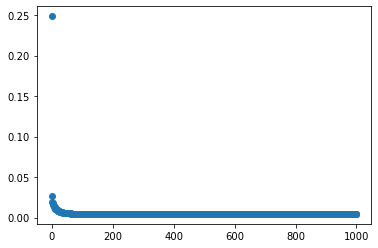

In [361]:
plt.scatter(x=list(range(0,1000)),y=J)

In [369]:
from sklearn.metrics import mean_absolute_error
score = mean_absolute_error(y_test,y_pred)
print(score)

0.06382925498101585
